<a href="https://colab.research.google.com/github/Vaidehi-9/ECON3916-33674-Statistical-Machine-Learning/blob/main/Lab2/%5BClass_2_%7C_Lab%5D_Deflating_History_with_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install FRED API lib
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

#Authenticate my key
#Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='ef2d505eb7284a52a07c876e73d6ce20')


In [3]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head(10))
print(df.tail(10))


Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
1964-06-01          2.53  31.01
1964-07-01          2.54  31.02
1964-08-01          2.55  31.05
1964-09-01          2.56  31.08
1964-10-01          2.55  31.12
            Nominal_Wage      CPI
2025-02-01         30.91  319.775
2025-03-01         30.97  319.615
2025-04-01         31.05  320.321
2025-05-01         31.14  320.580
2025-06-01         31.26  321.500
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [4]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


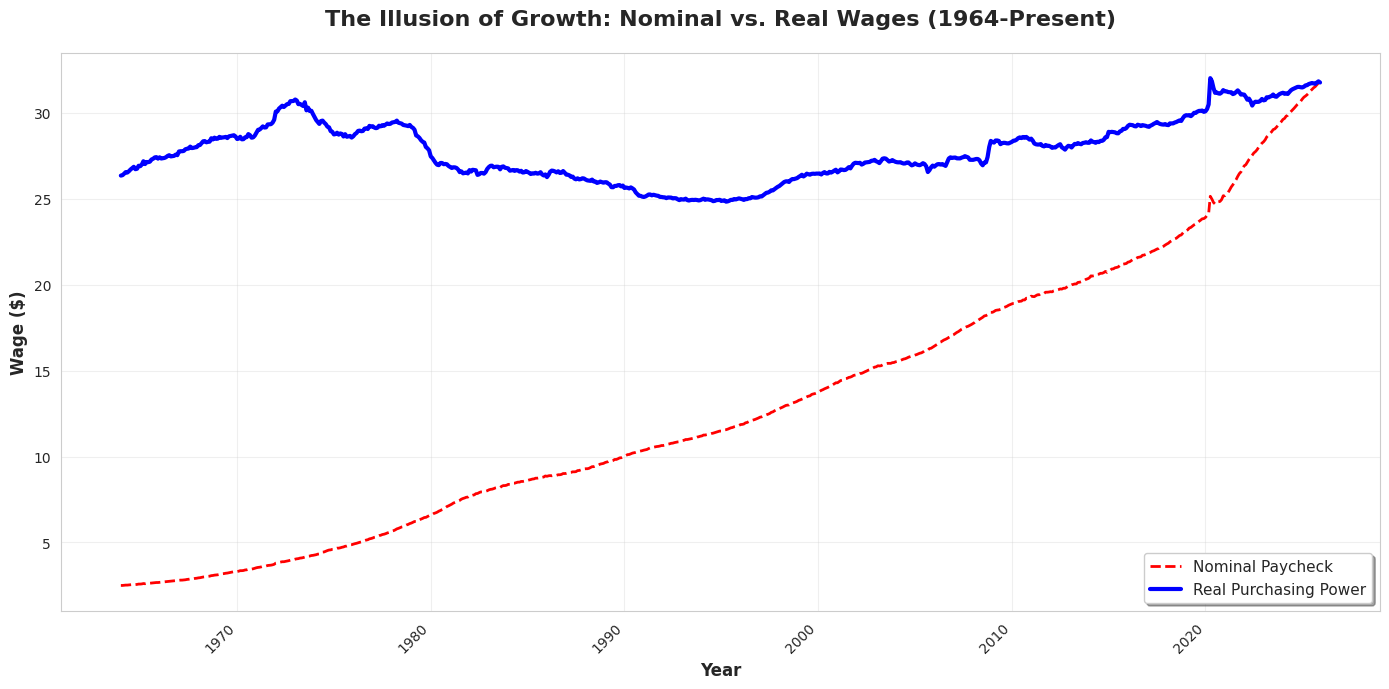

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the two wage series
ax.plot(df.index, df['Nominal_Wage'],
        color='red',
        linestyle='--',
        linewidth=2,
        label='Nominal Paycheck')

ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linewidth=3,
        label='Real Purchasing Power')

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage ($)', fontsize=12, fontweight='bold')

# Add legend
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# Add annotation for 2020 pandemic effect
# Find the 2020 data point for Real_Wage
try:
    # Attempt to locate 2020 in the index
    pandemic_year = '2020'
    if pandemic_year in df.index.astype(str):
        pandemic_idx = df.index[df.index.astype(str).str.contains(pandemic_year)][0]
        pandemic_value = df.loc[pandemic_idx, 'Real_Wage']

        ax.annotate('Pandemic Composition Effect',
                   xy=(pandemic_idx, pandemic_value),
                   xytext=(pandemic_idx, pandemic_value * 1.15),
                   arrowprops=dict(arrowstyle='->',
                                 connectionstyle='arc3,rad=0.3',
                                 color='black',
                                 lw=2),
                   fontsize=11,
                   fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.5',
                           facecolor='yellow',
                           alpha=0.7))
except:
    # If 2020 not found, place annotation at a reasonable location
    x_pos = df.index[int(len(df) * 0.85)]  # Near the end
    y_pos = df['Real_Wage'].max() * 0.95

    ax.annotate('Pandemic Composition Effect',
               xy=(x_pos, y_pos),
               xytext=(x_pos, y_pos * 1.05),
               arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3,rad=0.3',
                             color='black',
                             lw=2),
               fontsize=11,
               fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5',
                       facecolor='yellow',
                       alpha=0.7))

# Improve grid appearance
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

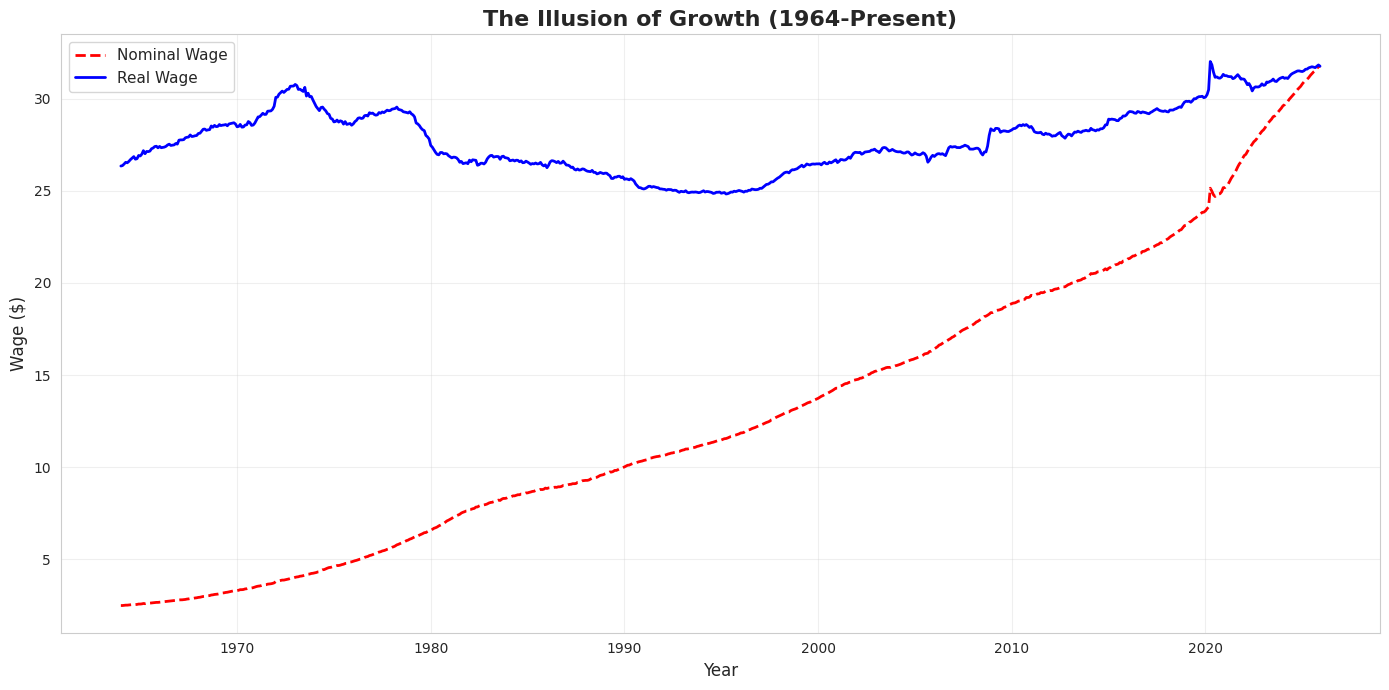

In [7]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the two wage series
ax.plot(df.index, df['Nominal_Wage'],
        color='red',
        linestyle='--',
        linewidth=2,
        label='Nominal Wage')

ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linewidth=2,
        label='Real Wage')

# Add title and labels
ax.set_title('The Illusion of Growth (1964-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Wage ($)', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11)

# Add annotation for 2020 pandemic effect
try:
    # Attempt to locate 2020 in the index
    pandemic_year = '2020'
    if pandemic_year in df.index.astype(str):
        pandemic_idx = df.index[df.index.astype(str).str.contains(pandemic_year)][0]
        pandemic_value = df.loc[pandemic_idx, 'Real_Wage']

        ax.annotate('Pandemic Composition Effect',
                   xy=(pandemic_idx, pandemic_value),
                   xytext=(pandemic_idx, pandemic_value * 1.1),
                   arrowprops=dict(arrowstyle='->',
                                 color='black',
                                 lw=1.5),
                   fontsize=10,
                   bbox=dict(boxstyle='round,pad=0.5',
                           facecolor='yellow',
                           alpha=0.7))
except:
    # Fallback: place annotation near the end of the series
    x_pos = df.index[int(len(df) * 0.85)]
    y_pos = df['Real_Wage'].max() * 0.95

    ax.annotate('Pandemic Composition Effect',
               xy=(x_pos, y_pos),
               xytext=(x_pos, y_pos * 1.05),
               arrowprops=dict(arrowstyle='->',
                             color='black',
                             lw=1.5),
               fontsize=10,
               bbox=dict(boxstyle='round,pad=0.5',
                       facecolor='yellow',
                       alpha=0.7))

# Add grid
ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

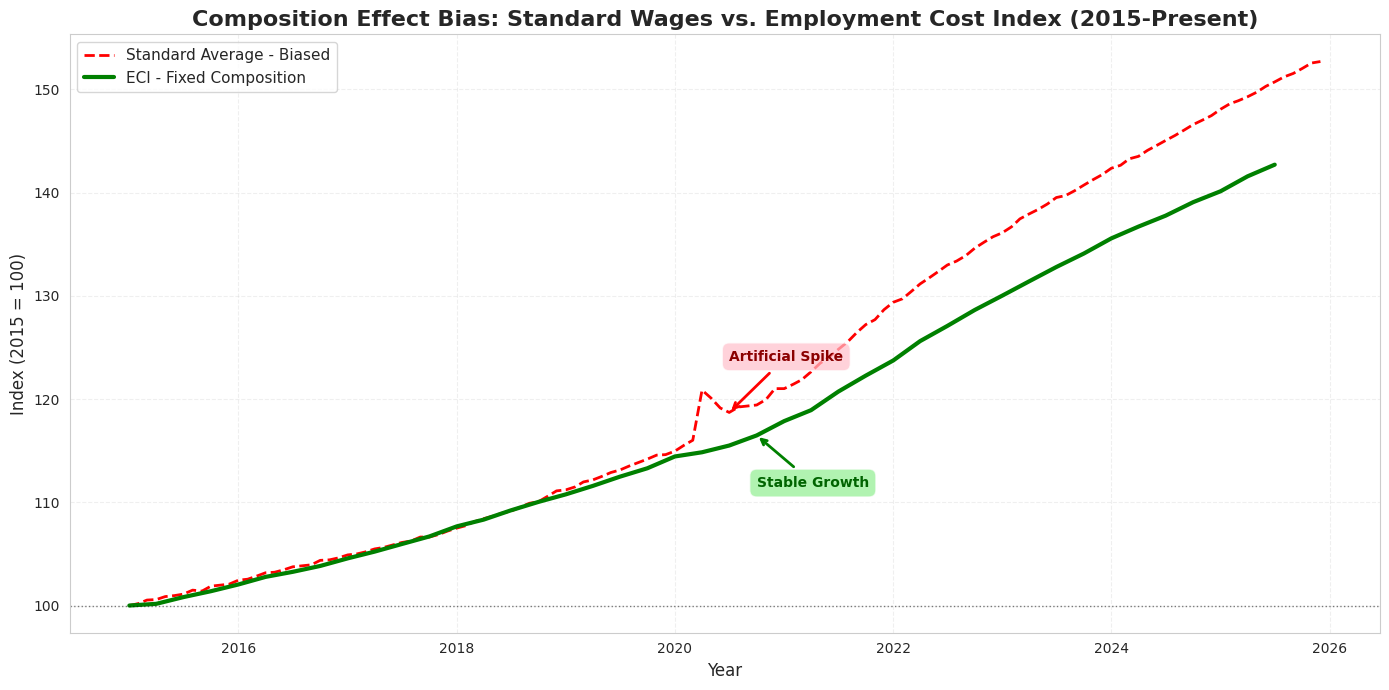

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Fetch the Employment Cost Index data
eci = fred.get_series('ECIWAG')

# Filter both series to 2015 onwards
start_date = '2015-01-01'
wages_filtered = wages[wages.index >= start_date]
eci_filtered = eci[eci.index >= start_date]

# Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# Create the chart
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both series
ax.plot(wages_rebased.index, wages_rebased,
        color='red',
        linestyle='--',
        linewidth=2,
        label='Standard Average - Biased')

ax.plot(eci_rebased.index, eci_rebased,
        color='green',
        linewidth=3,
        label='ECI - Fixed Composition')

# Add title and labels
ax.set_title('Composition Effect Bias: Standard Wages vs. Employment Cost Index (2015-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Index (2015 = 100)', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11, frameon=True)

# Add annotations for 2020 divergence
try:
    # Find 2020 data points
    pandemic_year = '2020'
    wages_2020_idx = wages_rebased.index[wages_rebased.index.astype(str).str.contains(pandemic_year)]
    eci_2020_idx = eci_rebased.index[eci_rebased.index.astype(str).str.contains(pandemic_year)]

    if len(wages_2020_idx) > 0 and len(eci_2020_idx) > 0:
        # Get mid-2020 values (around index 6 months in)
        wages_2020_val = wages_rebased[wages_2020_idx[min(6, len(wages_2020_idx)-1)]]
        wages_2020_date = wages_2020_idx[min(6, len(wages_2020_idx)-1)]

        eci_2020_val = eci_rebased[eci_2020_idx[min(6, len(eci_2020_idx)-1)]]
        eci_2020_date = eci_2020_idx[min(6, len(eci_2020_idx)-1)]

        # Annotate the artificial spike in standard wages
        ax.annotate('Artificial Spike',
                   xy=(wages_2020_date, wages_2020_val),
                   xytext=(wages_2020_date, wages_2020_val + 5),
                   arrowprops=dict(arrowstyle='->',
                                 color='red',
                                 lw=2),
                   fontsize=10,
                   color='darkred',
                   fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.5',
                           facecolor='pink',
                           alpha=0.7))

        # Annotate the stable growth in ECI
        ax.annotate('Stable Growth',
                   xy=(eci_2020_date, eci_2020_val),
                   xytext=(eci_2020_date, eci_2020_val - 5),
                   arrowprops=dict(arrowstyle='->',
                                 color='green',
                                 lw=2),
                   fontsize=10,
                   color='darkgreen',
                   fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.5',
                           facecolor='lightgreen',
                           alpha=0.7))
except Exception as e:
    print(f"Could not add 2020 annotations: {e}")

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Add horizontal line at 100
ax.axhline(y=100, color='black', linestyle=':', linewidth=1, alpha=0.5)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()